In [2]:
import pandas as pd
import numpy as np

In [3]:
## need to add instructions for anything i do manually

In [4]:
rename_map = {"Country name": "Country",
              "country": "Country",
              "Ladder score": "Happiness score",
              "upperwhisker": "Whisker-high",
              "lowerwhisker": "Whisker-low"
}

keep = ["Country", "Regional indicator", "Year", "Happiness score", "Whisker-high", "Whisker-low", "Explained by: GDP per capita",
        "Explained by: Log GDP per capita",  "Explained by: Social support", "Explained by: Health life expectancy",
        "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"]

dfs = {}
for i in range(15, 25):
    dfs[i] = pd.read_csv(f"./data/WHR{i}.csv")

for i in dfs.keys():
    dfs[i]["Year"] = pd.to_datetime(2000+i, format="%Y") #2000+i
    dfs[i].rename(rename_map, axis=1, inplace=True)    
    dfs[i] = dfs[i][[x for x in keep if x in dfs[i].columns]]

df = pd.concat(dfs.values())

In [5]:
## DATA CLEANING ##

rename_countries1 = {}
[rename_countries1.update({i: i[:-1]}) for i in sorted(df["Country"].value_counts().index.values) if "*" in i];

rename_countries2 = { ## found by manual analysis of the data
    "Czech Republic": "Czechia",
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong SAR, China": "Hong Kong",
    "North Cyprus": "Northern Cyprus",
    "Palestinian Territories": "State of Palestine", ## used in 2025
    "Taiwan Province of China": "Taiwan",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Turkey": "Turkiye",
    "Eswatini": "Swaziland/Eswatini", ## not fully sure what to do with these three
    "Eswatini, Kingdom of": "Swaziland/Eswatini", 
    "Swaziland": "Swaziland/Eswatini"
}

df = df[df["Country"] != "xx"] ## remove empty row
df["Country"] = df["Country"].replace(rename_countries1)
df["Country"] = df["Country"].replace(rename_countries2)


In [6]:
df.head()

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,Whisker-low,Explained by: GDP per capita
0,Switzerland,Western Europe,2015-01-01,7.587,1.396505,1.349505,0.665573,0.296775,0.419777,NaN,NaN,NaN
1,Iceland,Western Europe,2015-01-01,7.561,1.302324,1.402231,0.628772,0.436297,0.141451,NaN,NaN,NaN
2,Denmark,Western Europe,2015-01-01,7.527,1.325478,1.360581,0.649384,0.341386,0.483573,NaN,NaN,NaN
3,Norway,Western Europe,2015-01-01,7.522,1.458997,1.330955,0.669732,0.346989,0.365034,NaN,NaN,NaN
4,Canada,North America and ANZ,2015-01-01,7.427,1.326292,1.322608,0.632968,0.458109,0.329573,NaN,NaN,NaN


In [7]:
#[print(i) for i in sorted(df["Country"].value_counts().index.values)]

In [8]:
## DEALING WITH THE CONGO

# Congo / Congo (Brazzaville) / Congo (Kinshasa)
df.loc[df["Country"].isin([i for i in sorted(df["Country"].value_counts().index.values) if "Congo" in i])]

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,Whisker-low,Explained by: GDP per capita
119,Congo (Kinshasa),Sub-Saharan Africa,2015-01-01,4.5170,0.000000,1.001195,0.226054,0.248336,0.076245,NaN,NaN,NaN
138,Congo (Brazzaville),Sub-Saharan Africa,2015-01-01,3.9890,0.678661,0.662895,0.414661,0.123883,0.116855,NaN,NaN,NaN
124,Congo (Kinshasa),NaN,2016-01-01,4.2720,NaN,0.806765,0.156017,0.254578,0.060749,4.353000,4.191000,0.056606
126,Congo (Brazzaville),NaN,2016-01-01,4.2360,NaN,0.477987,0.379377,0.120771,0.097529,4.365000,4.107000,0.771093
123,Congo (Brazzaville),NaN,2017-01-01,4.2910,NaN,0.832000,0.435000,0.121000,0.080000,4.410000,4.172000,0.809000
125,Congo (Kinshasa),NaN,2017-01-01,4.2800,NaN,1.229000,0.236000,0.246000,0.060000,4.358000,4.202000,0.092000
113,Congo (Brazzaville),NaN,2018-01-01,4.5590,NaN,0.811000,0.514000,0.091000,0.077000,4.688000,4.430000,0.682000
131,Congo (Kinshasa),NaN,2018-01-01,4.2450,NaN,1.136000,0.312000,0.197000,0.052000,4.341000,4.149000,0.069000
102,Congo (Brazzaville),NaN,2019-01-01,4.8120,NaN,0.799000,0.372000,0.105000,0.093000,4.955000,4.668000,0.673000
126,Congo (Kinshasa),NaN,2019-01-01,4.4180,NaN,1.125000,0.269000,0.212000,0.053000,4.543000,4.293000,0.094000


---

In [9]:
df_global = pd.read_csv("data/Global Economy Indicators.csv")
df_global.columns = df_global.columns.str.strip()
for i in df_global.columns:
    if df_global[i].dtype == object:
        df_global[i] = df_global[i].str.strip()
df_global["Year"] = pd.to_datetime(df_global["Year"], format="%Y")

df2 = df_global[df_global["Year"] >= pd.to_datetime(2015, format="%Y")]
df2.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
45,4,Afghanistan,2015-01-01,61.143462,61.143462,33753499,Afghani,559,4.777856e+09,NaN,...,1.497766e+10,6.209330e+09,7.442523e+08,1.211308e+09,6.968190e+09,1.752209e+10,1.899054e+09,1.986447e+09,1.888222e+10,1.871305e+10
46,4,Afghanistan,2016-01-01,67.866086,67.866086,34636207,Afghani,525,4.638291e+09,NaN,...,1.444640e+10,5.841752e+09,7.413601e+08,1.296204e+09,7.073713e+09,1.716008e+10,1.583227e+09,1.978781e+09,1.819913e+10,1.801956e+10
47,4,Afghanistan,2017-01-01,68.026904,68.026904,35643418,Afghani,537,4.992454e+09,NaN,...,1.391303e+10,6.029924e+09,6.671211e+08,1.304544e+09,7.199680e+09,1.791394e+10,1.574009e+09,2.248362e+09,1.914502e+10,1.889635e+10
48,4,Afghanistan,2018-01-01,72.083247,72.083247,36686784,Afghani,507,4.060048e+09,NaN,...,1.630358e+10,7.400610e+09,1.134634e+09,1.802054e+09,7.232891e+09,1.748088e+10,1.601011e+09,2.121150e+09,1.861026e+10,1.841885e+10
49,4,Afghanistan,2019-01-01,77.737949,77.737949,37769499,Afghani,508,4.872438e+09,NaN,...,1.807539e+10,8.251464e+09,1.331477e+09,2.073301e+09,6.907645e+09,1.801690e+10,1.503540e+09,2.075666e+09,1.920501e+10,1.890449e+10


In [10]:
full_df = pd.merge(left=df, right=df2, how="left", left_on=['Country', 'Year'], right_on=['Country', 'Year'])

In [11]:
full_df.head()

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,Switzerland,Western Europe,2015-01-01,7.587,1.396505,1.349505,0.665573,0.296775,0.419777,NaN,...,3.670000e+11,3.560000e+11,1.230000e+11,1.370000e+11,3.270000e+11,6.800000e+11,5.688086e+10,1.210000e+11,7.010000e+11,7.020000e+11
1,Iceland,Western Europe,2015-01-01,7.561,1.302324,1.402231,0.628772,0.436297,0.141451,NaN,...,8.703213e+09,7.736736e+09,1.873793e+09,2.689039e+09,7.594633e+09,1.575032e+10,1.760557e+09,1.919948e+09,1.748609e+10,1.751721e+10
2,Denmark,Western Europe,2015-01-01,7.527,1.325478,1.360581,0.649384,0.341386,0.483573,NaN,...,1.430000e+11,1.470000e+11,3.754184e+10,4.747034e+10,1.330000e+11,2.630000e+11,2.764723e+10,3.845713e+10,3.120000e+11,3.030000e+11
3,Norway,Western Europe,2015-01-01,7.522,1.458997,1.330955,0.669732,0.346989,0.365034,NaN,...,1.680000e+11,1.240000e+11,2.651929e+10,9.783540e+10,1.530000e+11,3.430000e+11,3.328825e+10,3.157549e+10,4.020000e+11,3.860000e+11
4,Canada,North America and ANZ,2015-01-01,7.427,1.326292,1.322608,0.632968,0.458109,0.329573,NaN,...,9.000000e+11,5.340000e+11,1.550000e+11,2.590000e+11,7.550000e+11,1.450000e+12,1.100000e+11,1.810000e+11,1.530000e+12,1.560000e+12


In [12]:
full_df.sort_values(by="Country")

,Country,Regional indicator,Year,Happiness score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Whisker-high,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
1509,Afghanistan,NaN,2024-01-01,1.7210,0.628000,0.000000,0.000000,0.091000,0.088000,1.77500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,Afghanistan,South Asia,2020-01-01,2.5669,0.300706,0.356434,0.000000,0.135235,0.001226,2.62827,...,1.899194e+10,6.983058e+09,1.546263e+09,2.206409e+09,7.098671e+09,1.924517e+10,1.929933e+09,1.987511e+09,2.033238e+10,2.014344e+10
311,Afghanistan,NaN,2016-01-01,3.3600,NaN,0.110368,0.164305,0.312680,0.071116,3.43200,...,1.444640e+10,5.841752e+09,7.413601e+08,1.296204e+09,7.073713e+09,1.716008e+10,1.583227e+09,1.978781e+09,1.819913e+10,1.801956e+10
152,Afghanistan,South Asia,2015-01-01,3.5750,0.319821,0.302853,0.234138,0.365104,0.097188,NaN,...,1.497766e+10,6.209330e+09,7.442523e+08,1.211308e+09,6.968190e+09,1.752209e+10,1.899054e+09,1.986447e+09,1.888222e+10,1.871305e+10
455,Afghanistan,NaN,2017-01-01,3.7940,NaN,0.582000,0.106000,0.312000,0.061000,3.87400,...,1.391303e+10,6.029924e+09,6.671211e+08,1.304544e+09,7.199680e+09,1.791394e+10,1.574009e+09,2.248362e+09,1.914502e+10,1.889635e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Zimbabwe,Sub-Saharan Africa,2021-01-01,3.1450,0.457000,0.649000,0.359000,0.157000,0.075000,3.25900,...,1.810656e+10,7.452806e+09,3.001006e+09,6.172696e+09,5.789217e+09,2.274230e+10,1.500260e+09,6.371013e+09,2.352395e+10,2.411815e+10
613,Zimbabwe,NaN,2018-01-01,3.6920,NaN,1.094000,0.406000,0.132000,0.099000,3.80600,...,1.837230e+10,6.712015e+09,3.234232e+09,6.870555e+09,5.972541e+09,2.230743e+10,2.492558e+09,4.772648e+09,2.315156e+10,2.364527e+10
452,Zimbabwe,NaN,2017-01-01,3.8750,NaN,1.083000,0.336000,0.189000,0.095000,3.97900,...,1.749116e+10,6.693807e+09,3.091622e+09,6.637330e+09,5.437464e+09,2.076388e+10,2.250543e+09,4.421973e+09,2.118140e+10,2.204065e+10
288,Zimbabwe,NaN,2016-01-01,4.1930,NaN,0.714785,0.254290,0.185030,0.085817,4.28500,...,1.712664e+10,6.426700e+09,2.382829e+09,4.102626e+09,6.192997e+09,1.857579e+10,2.091819e+09,4.128620e+09,1.877295e+10,2.054868e+10


In [13]:
full_df.columns

Index(['Country', 'Regional indicator', 'Year', 'Happiness score',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Whisker-high', 'Whisker-low', 'Explained by: GDP per capita',
       'CountryID', 'AMA exchange rate', 'IMF based exchange rate',
       'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC 

In [14]:
rename_cols = {
    "Happiness score": "Happiness_score",
    "Gross Domestic Product (GDP)": "GDP",
}
full_df.rename(rename_cols, axis=1, inplace=True)
subdf = full_df[full_df["Year"] < pd.to_datetime(2022, format="%Y")]
subdf["GDP"].dropna()

0       7.020000e+11
1       1.751721e+10
2       3.030000e+11
3       3.860000e+11
4       1.560000e+12
            ...     
1079    2.373416e+09
1080    1.761486e+10
1081    1.106992e+10
1082    2.411815e+10
1083    1.493901e+10
Name: GDP, Length: 957, dtype: float64

In [15]:
import statsmodels.api as stats

model = stats.formula.ols("Happiness_score ~ GDP", data = full_df, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     33.56
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           9.38e-09
Time:                        17:21:25   Log-Likelihood:                -1471.9
No. Observations:                 957   AIC:                             2948.
Df Residuals:                     955   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3996      0.038    143.364      0.000       5.326       5.473
GDP         9.703e-14   1.68e-14      5.793      0.000    6.42e-14     1.3e-13
==============================================================================
Omnibus:                       65.024   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.214
Skew:                          -0.013   Prob(JB):                     9.10e-06
Kurtosis:                       2.237   Cond. No.                     2.32e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#gdp per capita

In [17]:
## autocorrelation over each metric (happiness most important) to check if they're correlated with themselves

#do change in happiness
#change in gdp growth
#delta gdp per capita


In [18]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [19]:
df_3.rename({" Gross Domestic Product (GDP) ": "GDP"}, axis=1, inplace=True)

NameError: name 'df_3' is not defined

In [ ]:
pandas.Series.autocorr

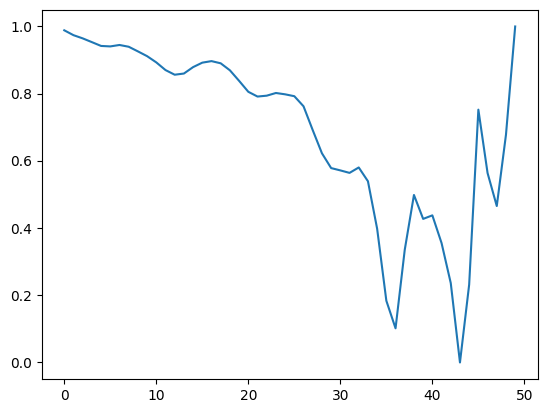

In [ ]:
testdf = df_global[df_global["Country"] == "United Kingdom"]

rs = []

for i in range(1,len(testdf)-1):
    s1 = testdf["Gross Domestic Product (GDP)"].iloc[:-i].values
    s2 = testdf["Gross Domestic Product (GDP)"].iloc[i:].values
    rs.append(pearsonr(s1, s2).statistic)

plt.plot(rs)


In [ ]:
testdf["Gross Domestic Product (GDP)"].autocorr()

np.float64(0.9879897223889952)

In [ ]:
can do autocorr against every country using groupby -- show graph, trend, error bars

In [23]:
econdf = pd.read_csv("data/Economic_metrics.csv")
econdf.head(3)

,Country,Code,ContinentCode,Year,Gross Domestic Product billions of U.S. dollars,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Inflation: percent change in the Consumer Price Index,Average hours worked per year,Trade balance as percent of GDP,Trade balance billion USD,Government spending as percent of GDP,Government spending billion USD,Tax revenue percent of GDP,Taxes on goods and services percent of total revenue,Gini income inequality index,Poverty percent of population,Percent income earned by the top 10 percent of earners
0,Afghanistan,AFG,AS,2005,6.20,254.18,1908.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,2006,6.97,274.22,1930.0,6.8,NaN,NaN,NaN,NaN,NaN,6.97,5.76,NaN,NaN,NaN
2,Afghanistan,AFG,AS,2007,9.75,376.22,2155.0,8.7,NaN,NaN,NaN,NaN,NaN,5.28,4.31,NaN,33.7,NaN


In [24]:
econdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country                                                 3845 non-null   object 
 1   Code                                                    3845 non-null   object 
 2   ContinentCode                                           3366 non-null   object 
 3   Year                                                    3845 non-null   int64  
 4   Gross Domestic Product billions of U.S. dollars         3833 non-null   float64
 5   GDP per capita current U.S. dollars                     3833 non-null   float64
 6   GDP per capita Purchasing Power Parity                  3737 non-null   float64
 7   Inflation: percent change in the Consumer Price Index   3525 non-null   float64
 8   Average hours worked per year         

In [127]:
year = 2018
data = econdf[econdf["Year"] == year]
print(f"PERCENTAGE MISSING DATA FOR EACH COLUMN FOR {year}")
print(round((data.isnull().sum() / len(data))*100, 2))

print(f"\nPERCENTAGE MISSING DATA OVERALL FOR {year}")
print(round((data.isnull().sum().sum() / data.size)*100, 2))

PERCENTAGE MISSING DATA FOR EACH COLUMN FOR 2018
Country                                                    0.00
Code                                                       0.00
ContinentCode                                             12.50
Year                                                       0.00
Gross Domestic Product billions of U.S. dollars            0.00
GDP per capita current U.S. dollars                        0.00
GDP per capita Purchasing Power Parity                     2.08
Inflation: percent change in the Consumer Price Index      8.33
Average hours worked per year                             79.17
Trade balance as percent of GDP                           10.94
Trade balance billion USD                                 22.40
Government spending as percent of GDP                     12.50
Government spending billion USD                           12.50
Tax revenue percent of GDP                                29.17
Taxes on goods and services percent of total revenue   

In [150]:
print("Percentage of data missing by year (sorted):\n_____________________")

missing_by_year = econdf.groupby("Year").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2))#.sort_values()

Percentage of data missing by year (sorted):
_____________________


/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_72710/1442699989.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = econdf.groupby("Year").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2))#.sort_values()


/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_72710/380931488.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  series = econdf.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()


Country
Slovenia     3.61
Finland      3.61
Spain        3.61
Estonia      3.61
Latvia       3.61
Greece       3.89
Italy        3.89
Lithuania    3.89
Portugal     3.89
Slovakia     4.44
dtype: float64

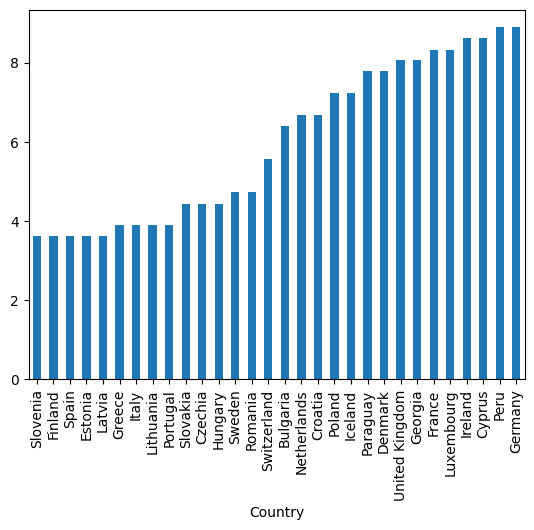

In [140]:
country = False #"Slovenia"

if country:
    data2 = econdf[econdf["Country"] == country]
    print(f"PERCENTAGE MISSING DATA FOR EACH COLUMN FOR {country}")
    print(round((data2.isnull().sum() / len(data2))*100, 2))
    print(f"\nPERCENTAGE MISSING DATA OVERALL FOR {country}")
    print(round((data2.isnull().sum().sum() / data2.size)*100, 2))

series = econdf.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
display(series.head(10))
series.head(30).plot(kind="bar");

<Axes: xlabel='Country'>

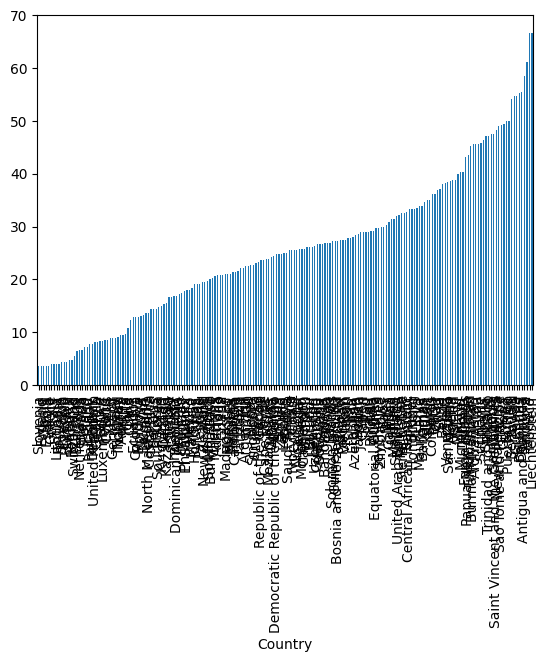

In [147]:
series.plot(kind="bar")

<Axes: xlabel='Year'>

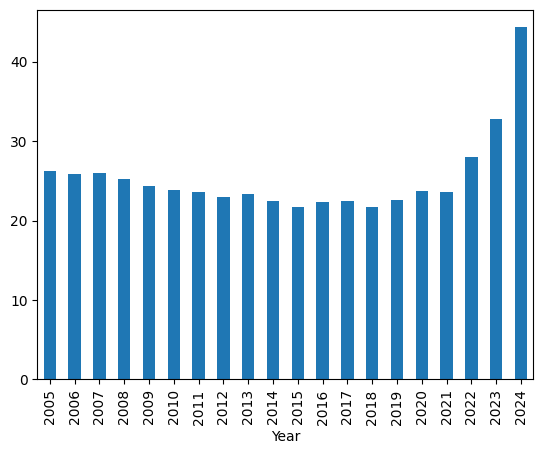

In [151]:
missing_by_year.plot(kind="bar")

<Axes: xlabel='Year'>

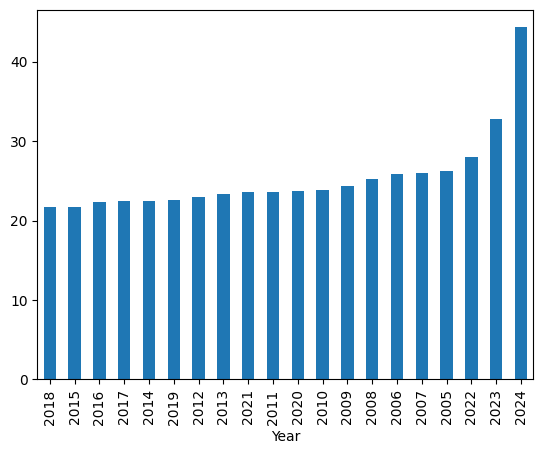

In [153]:
missing_by_year.sort_values().plot(kind="bar")

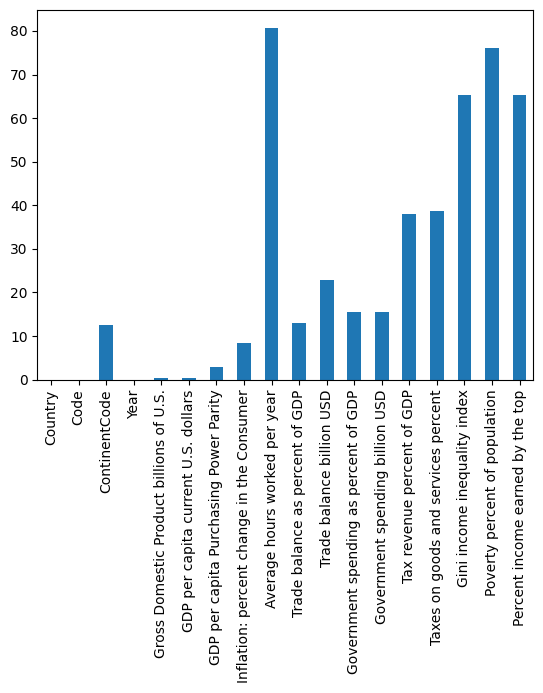

In [171]:
bycolumn = econdf.apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2))
bycolumn.plot(kind="bar")
ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

In [174]:
print("PERCENTAGE MISSING DATA BY ECONOMIC METRIC")
bycolumn

PERCENTAGE MISSING DATA BY ECONOMIC METRIC


Country                                                    0.00
Code                                                       0.00
ContinentCode                                             12.46
Year                                                       0.00
Gross Domestic Product billions of U.S. dollars            0.31
GDP per capita current U.S. dollars                        0.31
GDP per capita Purchasing Power Parity                     2.81
Inflation: percent change in the Consumer Price Index      8.32
Average hours worked per year                             80.78
Trade balance as percent of GDP                           12.90
Trade balance billion USD                                 22.94
Government spending as percent of GDP                     15.42
Government spending billion USD                           15.47
Tax revenue percent of GDP                                38.05
Taxes on goods and services percent of total revenue      38.73
Gini income inequality index            

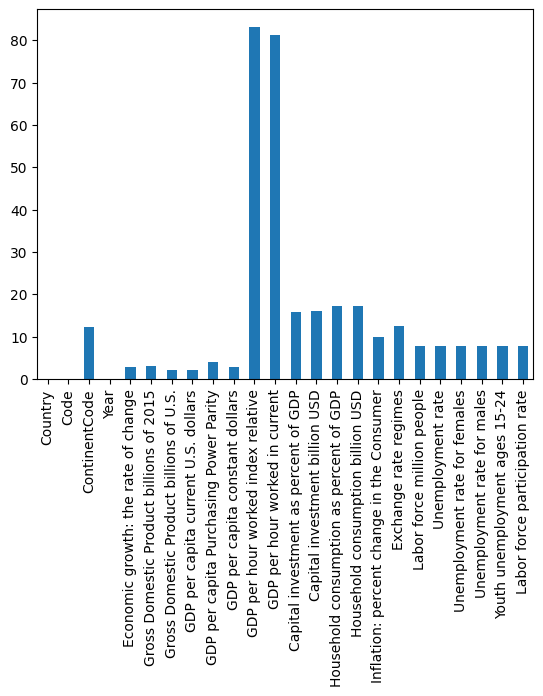

In [177]:
newdf = pd.read_csv("13-12-25 11_12_00_theglobaleconomy.csv")
bycol = newdf.apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2))
bycol.plot(kind="bar")

ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

In [201]:
import os
path = "/Users/eddie/Downloads/theglobaleconomy data/annual/"
files = os.listdir(path)

merged = None

for filename in files:
    _df = pd.read_csv(path+filename)
    if merged is None:
        merged = _df
    else:
        merged = pd.merge(merged, _df, on=["Country", "Year", "Code", "ContinentCode"], how="outer")
merged

,Country,Code,ContinentCode,Year,Internet users percent of population,Broadband internet subscribers in thousands,Fixed broadband internet subscribers per 100 people,Mobile phone subscribers in millions,Mobile phone subscribers per 100 people,Mobile network coverage percent of the population,...,Healthcare price index world average = 100,Transport prices world average = 100,Hotel and restaurant price index world average = 100,Vehicle prices world average = 100,Communication price index world average = 100,Recreation and culture price index world average = 100,Education service price index world average = 100,Machinery and equipment prices world average = 100,Short-term debt percent of total external debt,Short-term external debt percent of international reserves
0,Afghanistan,AFG,AS,1960,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,Zimbabwe,ZWE,AF,2026,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13970,Zimbabwe,ZWE,AF,2027,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13971,Zimbabwe,ZWE,AF,2028,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13972,Zimbabwe,ZWE,AF,2029,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


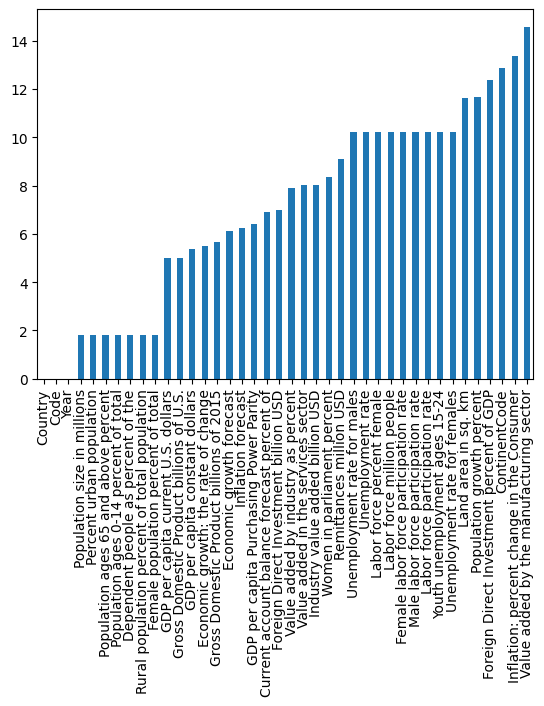

In [231]:
merged = merged[(merged["Year"] >= 2015) & (merged["Year"] <= 2024)]
bycol = merged.apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycol[:40].plot(kind="bar")

ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

In [232]:
bycol

Country                                                                      0.00
Code                                                                         0.00
Year                                                                         0.00
Population size in millions                                                  1.80
Percent urban population                                                     1.80
                                                                            ...  
Mobile network coverage percent of the population                           86.12
Informal employment percent of total employment                             87.58
Stock market capitalization w/o top 10 firms percent of total market cap    89.48
Stock market value traded w/o top 10 firms % of total value traded          89.68
Migrant population percent of total population                              91.43
Length: 145, dtype: float64

In [233]:
print(bycol[:20])
print(bycol[20:40])
print(bycol[40:60])
print(bycol[60:80])
print(bycol[80:100])
print(bycol[100:120])
print(bycol[120:])

Country                                                      0.00
Code                                                         0.00
Year                                                         0.00
Population size in millions                                  1.80
Percent urban population                                     1.80
Population ages 65 and above percent of total                1.80
Population ages 0-14 percent of total                        1.80
Dependent people as percent of the working age population    1.80
Rural population percent of total population                 1.80
Female population percent of total                           1.80
GDP per capita current U.S. dollars                          5.01
Gross Domestic Product billions of U.S. dollars              5.01
GDP per capita constant dollars                              5.36
Economic growth: the rate of change of real GDP              5.51
Gross Domestic Product billions of 2015 U.S. dollars         5.66
Economic g

In [218]:
for i in merged.Country.value_counts().index.sort_values().values:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma (Myanmar)
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Euro area
Faroe Islands
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Macao
Madagascar
Malawi
Malaysia
Maldiv

In [ ]:
newdf.drop([""])

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,Gross Domestic Product billions of 2015 U.S. dollars,Gross Domestic Product billions of U.S. dollars,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant dollars,...,Household consumption as percent of GDP,Household consumption billion USD,Inflation: percent change in the Consumer Price Index,Exchange rate regimes,Labor force million people,Unemployment rate,Unemployment rate for females,Unemployment rate for males,Youth unemployment ages 15-24,Labor force participation rate
0,Afghanistan,AFG,AS,2012,12.75,17.4,19.91,651.42,2985.0,568.93,...,NaN,NaN,6.4,7.0,7.52,7.86,10.32,7.34,10.05,46.96
1,Afghanistan,AFG,AS,2013,5.60,18.4,20.15,637.09,3047.0,580.60,...,NaN,NaN,7.4,7.0,7.86,7.93,10.37,7.38,10.11,47.03
2,Afghanistan,AFG,AS,2014,2.72,18.9,20.50,625.05,3018.0,575.15,...,NaN,NaN,4.7,7.0,8.23,7.91,10.32,7.34,10.09,47.10
3,Afghanistan,AFG,AS,2015,1.45,19.1,19.13,565.57,2968.0,565.57,...,NaN,NaN,-0.7,7.0,8.58,9.05,11.61,8.40,12.55,47.17
4,Afghanistan,AFG,AS,2016,2.26,19.6,18.12,522.08,2959.0,563.87,...,NaN,NaN,4.4,7.0,8.88,10.13,12.83,9.40,14.95,47.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,Zimbabwe,ZWE,AF,2020,-7.82,19.1,26.87,1730.45,2987.0,1230.19,...,80.71,21.69,557.2,6.0,5.81,8.62,8.50,8.74,14.26,64.76
2526,Zimbabwe,ZWE,AF,2021,8.47,20.7,27.24,1724.39,3185.0,1311.53,...,74.87,20.40,98.5,6.0,6.01,9.54,9.86,9.22,15.21,65.40
2527,Zimbabwe,ZWE,AF,2022,6.14,22.0,32.79,2040.55,3323.0,1368.50,...,77.76,25.50,104.7,6.0,6.12,10.09,10.56,9.61,16.98,65.21
2528,Zimbabwe,ZWE,AF,2023,5.34,23.2,35.23,2156.03,3442.0,1417.56,...,76.27,26.87,NaN,6.0,6.23,8.76,8.82,8.69,14.48,65.00


/var/folders/px/b_j3wj7x1c3fccm_vc5scmgr0000gn/T/ipykernel_72710/1258984797.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bycol = merged.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()


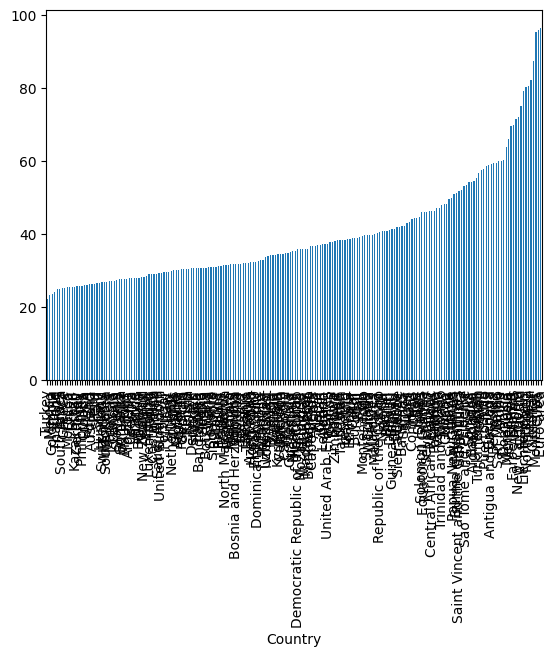

In [240]:
bycol = merged.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycol.plot(kind="bar")

ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

In [ ]:
len(bycol[bycol <= 30])

51

In [254]:
bycol[:-40]

Country
Turkey                      22.21
Mexico                      23.38
Colombia                    23.45
Chile                       24.21
Thailand                    24.90
                            ...  
Central African Republic    46.28
Palestine                   46.41
Tonga                       47.10
Vanuatu                     47.17
Trinidad and Tobago         48.07
Length: 160, dtype: float64